In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("D:/DS ML&AI/Capstone4/env/Scripts/online_retail.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [3]:
data.shape

(541909, 8)

In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#finding empty Customer ID
rec=data[data['CustomerID'].isnull()]
print(rec)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

                InvoiceDate  UnitPrice  CustomerID         Country  
622     2022-12-01 11:52:00       0.00         NaN  Un

In [9]:
#dropping records with empty customer ID
data.dropna(subset=['CustomerID'],inplace=True)

In [10]:
data.shape

(406829, 8)

In [11]:
#finding cancelled invoices where invoice number starts with C
data[data['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
# Remove rows where InvoiceNo starts with 'C'
data = data[~data['InvoiceNo'].str.startswith('C')]

In [13]:
data.shape

(397924, 8)

In [14]:
#reset the index
data.reset_index(drop=True, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [16]:
#find the count of rows where Quantity 0 or negative
count=(data['Quantity'] <= 0).sum()
print(count)

0


In [17]:
#find rows with 0 or neagtive UnitPrice
count=(data['UnitPrice'] <= 0).sum()
print(count)

40


In [18]:
#remove rows with 0 or neagtive UnitPrice
data=data[data['UnitPrice']> 0]

In [19]:
data.shape

(397884, 8)

In [20]:
#converting Invoice date column type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [21]:
data.shape


(397884, 8)

In [22]:
#getting the duplicate count
data.duplicated().sum()


np.int64(5192)

In [23]:
#droping the duplicate
data=data.drop_duplicates()

In [24]:
data.shape

(392692, 8)

In [25]:
data.to_csv("PreProcessed.csv",index=False)

In [26]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Unique Invoices')

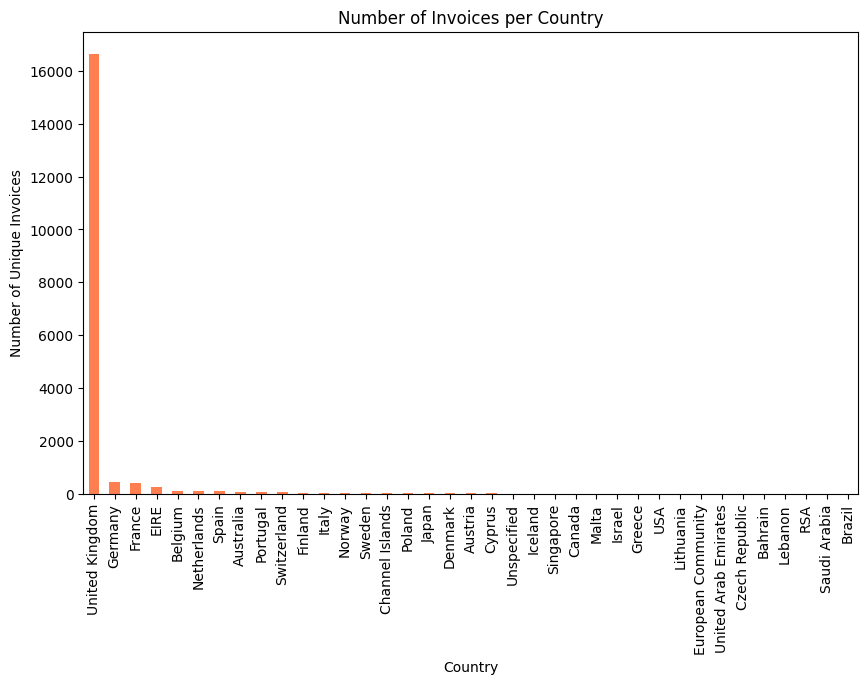

In [28]:
#transaction volume by country


trans_counts = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# 2. Plot using Matplotlib
plt.figure(figsize=(10, 6))
trans_counts.plot(kind='bar', color='coral')

plt.title('Number of Invoices per Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Invoices')




Text(0, 0.5, 'Quantity of Product Sold')

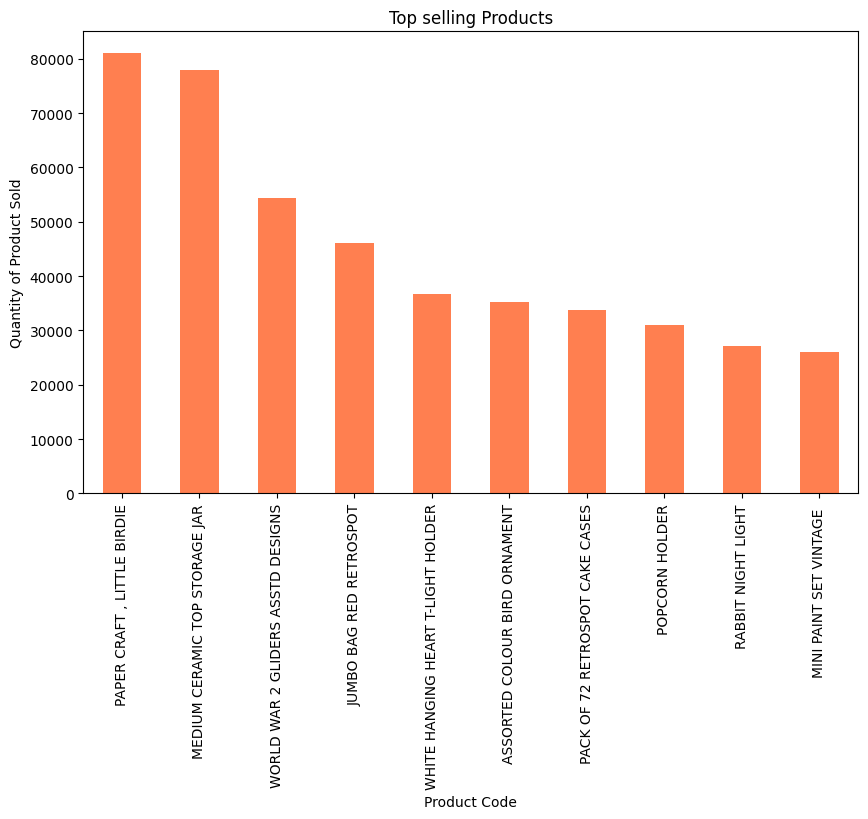

In [29]:
#Top 10 selling products
Top_product = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# 2. Plot using Matplotlib
plt.figure(figsize=(10, 6))
Top_product.head(10).plot(kind='bar', color='coral')

plt.title('Top selling Products')
plt.xlabel('Product Code')
plt.ylabel('Quantity of Product Sold')


Text(0, 0.5, 'Total Quantity Purchased')

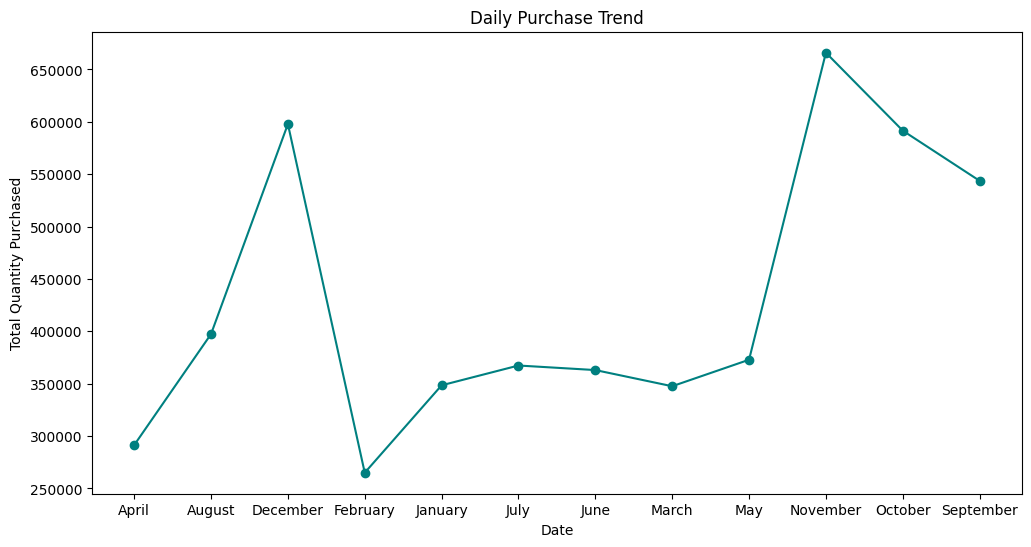

In [30]:
# purchase trends over time
Monthly_trend = data.groupby(data['InvoiceDate'].dt.month_name())['Quantity'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(Monthly_trend.sort_index().index, Monthly_trend.values, marker='o', linestyle='-', color='teal')

plt.title('Daily Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Purchased')

In [31]:
Monthly_trend.sort_index(ascending=True)

InvoiceDate
April        291366
August       397373
December     597825
February     265027
January      348473
July         367360
June         363014
March        347582
May          372864
November     665923
October      591543
September    543652
Name: Quantity, dtype: int64

In [32]:
#RFM
# Create a TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Define snapshot date (latest date in data + 1 day)
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by Customer to calculate RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})



In [33]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [34]:
rfm.to_csv("RFM.csv",index=True)

In [35]:
#monetary distribution per transaction
monDist_trans= data.groupby('InvoiceNo')['TotalPrice'].sum()

Text(0, 0.5, 'Number of Invoices')

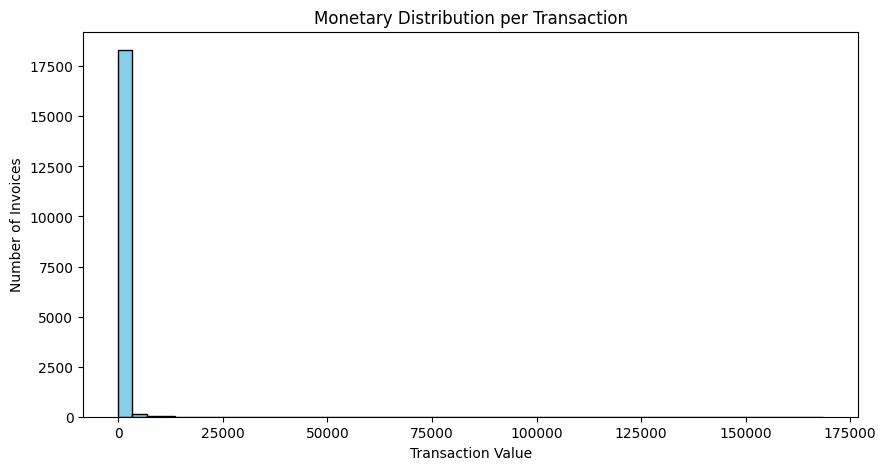

In [36]:
plt.figure(figsize=(10, 5))
plt.hist(monDist_trans, bins=50, color='skyblue', edgecolor='black')
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Transaction Value')
plt.ylabel('Number of Invoices')

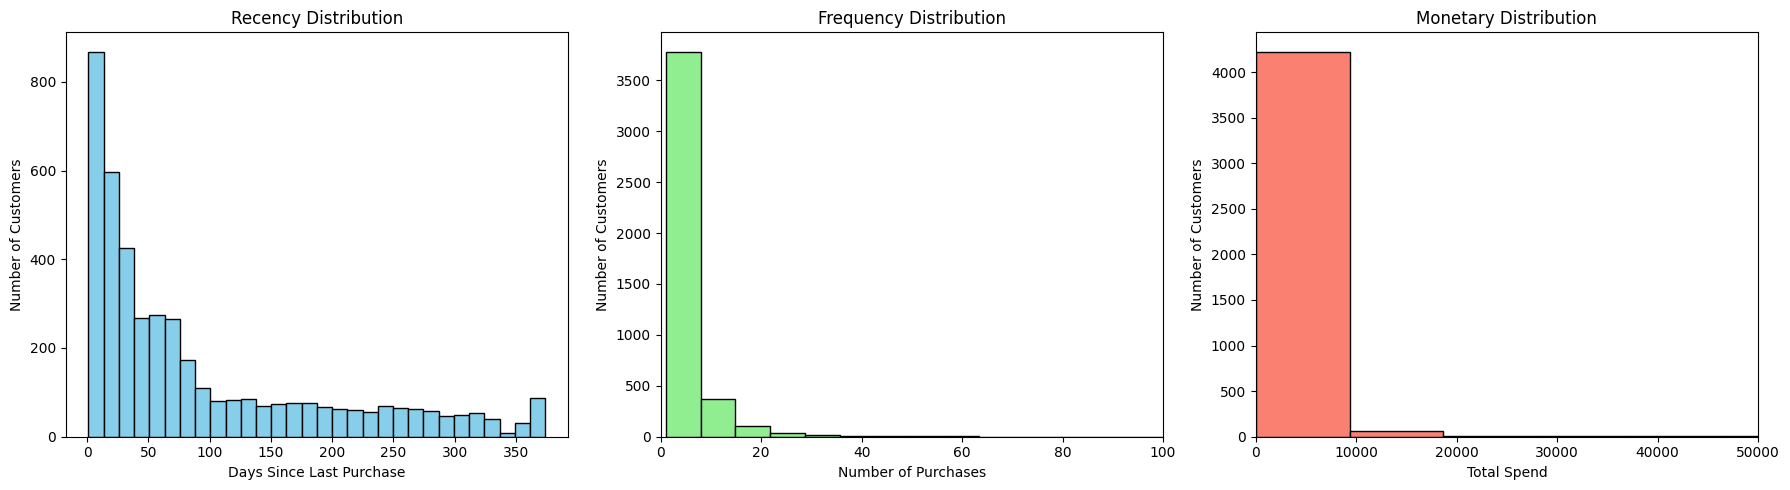

In [37]:
#RFM plot
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

# Frequency
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.xlim(0,100)

# Monetary
plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.xlim(0,50000)

plt.tight_layout()
plt.show()